# Overview
As we've seen, most of the machine learning process doesn't involve machine learning. A lot of our effort goes towards wrangling, visualizing, and cleaning up the data. But now we have our dataset in the format we need it and we're finally ready to do some prediction!

In [1]:
import sklearn
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

Let's start by loading in the data which we saved in our last notebook:

In [2]:
import pickle
with open("diabetes_data.pkl", "rb") as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
325,1,157.0,72.000000,21.00000,168.000000,25.600000,0.123,24
546,5,187.0,76.000000,27.00000,207.000000,43.600000,1.034,53
146,9,57.0,80.000000,37.00000,155.548223,32.800000,0.096,41
120,0,162.0,76.000000,56.00000,100.000000,53.200000,0.759,25
49,7,105.0,72.405184,29.15342,155.548223,32.457464,0.305,24


In [4]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


 # Modeling the Data

## Fitting a model
To train a machine learning model, we **fit** it to the data. In scikit-learn, every model has the same `fit(X, y)` method.

Once we fit a model, we can then use it to **predict** on new data.

This **fit -> predict -> evaluate** pattern is one of the core components of machine learning. You should always fit using the training data and then predict and evaluate on the testing data.

We'll start by training a [**Random Forest**](https://en.wikipedia.org/wiki/Random_forest) model. This tends to be a high-performing model on many datasets, so it's a good starting point. We won't go into too much detail with this model, but an image below shows the general process. A random forest consists of many decision trees (another type of ML model) working together to make a prediction. [This Medium article](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d) gives a high-level overview of this model.


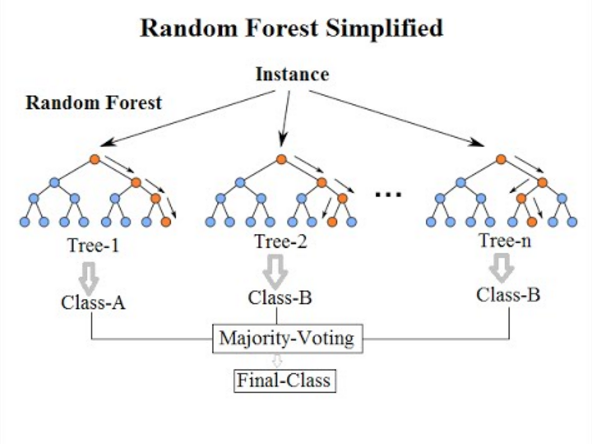

In [5]:
Image("./random_forest.png")

First, we'll import the model class from scikit-learn. Then we'll instantiate it and save it to a variable called `clf` (short for **"classifier"**)"

### TODO
Import `RandomForestClassifier` from `sklearn.ensemble`. Then instantiate it and save it to a variable called `clf`.

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
clf = RandomForestClassifier()

Then we'll **fit** our model to the data by calling `clf.fit()` and passing in our training data.

### TODO
Call the random forest's fit method and pass in `X_train` and `y_train` as arguments.

In [8]:
clf.fit(X_train, y_train)

RandomForestClassifier()

## Evaluating a model
Once we have trained a model, we need to know how well it does. To achieve this, we'll see if it can correctly predict the classes of the testing data. 

First, we'll **predict** on `X_test` using `clf.predict(X_test)`. This will give us an array of predictions for each row which we'll compare with the labels for these rows.

### TODO
Create a variable called `pred` which is the output of `clf.predict`:

In [9]:
pred = clf.predict(X_test)

Now, let's compare the labels and predictions. Let's start by doing it visually. We'll print out the first 25 labels and predictions and see if we can spot any differences:

In [10]:
print("Truth:", list(y_test[:25]))
print("Pred: ", list(pred[:25]))

Truth: [0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]
Pred:  [0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


### Discussion
A classifier is correct when the predicted label in `pred` is the same as the actual label in `y`. What does it mean when `y_test` and `pred` are different in these situations?
- 1 is predicted but 0 is actual
- 0 is actual but 1 is predicted

We want to have some numeric score to tell us how the dataset is doing as a whole. The simplest metric is **accuracy**, which tells us what proportion of times our model makes the correct prediction.  We can compute this by using the `accuracy_score` method from scikit-learn and passing in the labels and predictions.

### TODO
Compute the accuracy score by passing in `y_test` and `pred`.

In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.7402597402597403

# Choosing an algorithm
There are many different types of algorithms that can be used for machine learning classification. Each one works a little differently and some work better for a specific problem. We started by using a single model, but in practice you want to try out a a few different models and train each of them, then analyze and compare the results.

We won't go into the details about each classifier, but we'll try out each of these 6 classifiers.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

We'll save each of these models in a dictionary with the keys as an abbreviated name so we can keep track of it.

In [13]:
models = {"LR": LogisticRegression(),
          "NB": GaussianNB(),
          "KNN": KNeighborsClassifier(),
          "DT": DecisionTreeClassifier(),
          "RFC": RandomForestClassifier(),
          "SVM": SVC()
         }


Next, we'll loop through each of the models, fit them to our training data, predict on our testing data, and calculate the accuracy. We'll then save the name and accuracy score so we can analyze performance later.

Since we're repeating steps for each model, it makes sense to turn these steps into a **function**.

### TODO
Finish defining the function below. Give it an informative name and two parameters: `clf` and `name`.

In [14]:
def train_model(clf, name):
    print("Training {}".format(name))
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    pred = clf.predict(X_test)
    # Measure the accuracy
    accuracy  = accuracy_score(y_test, pred)
    print("Accuracy: {}".format(accuracy))
    print()
    return accuracy

Now, let's call our function on each of the models:

In [15]:
model_scores = []
model_names_scores = []
for name, clf in models.items():
    accuracy = train_model(clf, name)
    
    # Append to this list to analyze later
    model_names_scores.append((name, accuracy))

Training LR
Accuracy: 0.7532467532467533

Training NB
Accuracy: 0.7207792207792207

Training KNN
Accuracy: 0.7142857142857143

Training DT
Accuracy: 0.7402597402597403

Training RFC
Accuracy: 0.7467532467532467

Training SVM
Accuracy: 0.7662337662337663



/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Evaluation and Analysis
Let's see how our classifiers did on our test set. Let's start by sorting the scores by accuracy and plotting their performance.

In [16]:
sorted_name_scores = sorted(model_names_scores, key=lambda x:x[1], reverse=True)
sorted_names, sorted_scores = zip(*sorted_name_scores)

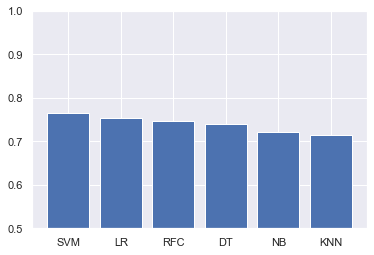

In [17]:
x_plot = range(len(sorted_names))
fig, ax = plt.subplots()

ax.bar(x_plot, sorted_scores)
ax.set_ylim(0.5, 1.0)

ax.set_xticks(x_plot)
_ = ax.set_xticklabels(sorted_names)

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

## Closer analysis
Now, let's take the best-performing model and look at more details. While training, we only looked at the **accuracy** of the classifier. But an accuracy score is sometimes insufficient. 

One thing to consider is **false positives** vs. **false negatives**. **False positives** occur when we incorrectly identify positive cases. In our scenario, this would mean saying a patient has a diabetes when they don't. **False negatives** are the reverse: when we fail to identify a positive case. For example, saying a patient doesn't have diabetes when they do.

**Discussion**
- Can you think of some reasons why accuracy might be insufficient?
- Are false positives or false negatives worse?

To supplement this, we'll look at three more metrics: **precision**, **recall**, and **f1-score**. Here is a blog post that explains the difference between these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

In summary, here's what each metric tells us:
- **Precision**: If our classifier says a patient has diabetes, how likely is it that our classifier is correct? **A system which produces many *false positives* will have *lower* precision**
- **Recall**: If our classifier is given a patient with diabetes, how likely is it that our classifier will correctly predict that? **A system which has many *false negatives* will have *lower* recall**
- **F1**: This is a balanced average of the two

Let's calculate these more detailed metrics with our highest-performing model. 

### TODO
Look at the model accuracies you calculated above. Pick the highest-performing model, instantiate it, and retrain it. Then predict on the test set.

In [19]:
best_clf = LogisticRegression()
best_clf

LogisticRegression()

In [20]:
best_clf.fit(X_train, y_train) # Retrain
pred = best_clf.predict(X_test)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Now, let's calculate the precision, recall, and F1-score. Scikit-learn offers a useful function called `classification_report` which prints these values out for us. Since this is a binary task, we only really care about how well it performs on the positive class, so we'll restrict to looking at performance where the label is **1**.

### TODO
Call `classification_report` and compare `y_test` and `pred`.

In [21]:
print(classification_report(y_test, pred, labels=[1]))

              precision    recall  f1-score   support

           1       0.72      0.60      0.65        60

   micro avg       0.72      0.60      0.65        60
   macro avg       0.72      0.60      0.65        60
weighted avg       0.72      0.60      0.65        60



### Discussion
- Does our model's performance look as good when looking at these metrics as it did when we looked at accuracy? What accounts for the difference?
- Does our model get more **false positives** or **false negatives**?

# Improving model performance
There are many more steps you could take to improve the performance of your model. These steps include:
- Scaling your data
- Using cross-validation instead of train/test split
- Hyperparamter tuning (see [this Medium article](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74) for an example of this)

This is out of scope for this module, but this Medium 

This [xkcd comic](https://xkcd.com/1838/) illustrates the general process of improving your system:

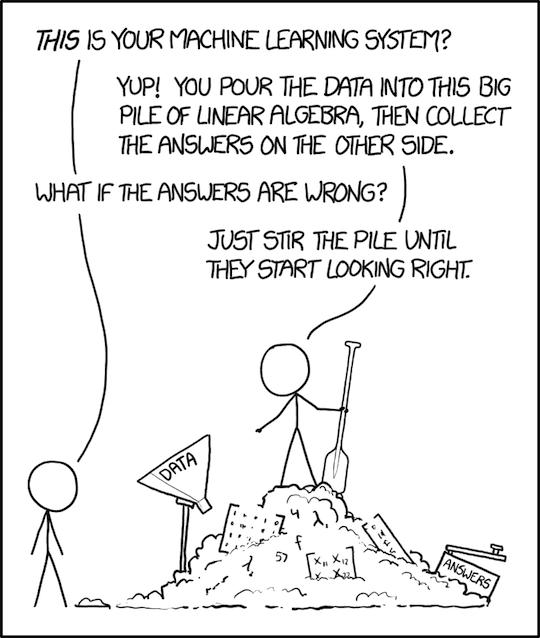

In [22]:
Image("./xkcd_model.png")

# Additional Resources
We just scraped the surface of machine learning today! There's so much to learn about this field, and the best way to learn is by doing hands-on projects and examples. If you are interested in learning more, here are some more resources:

- [DataCamp Machine Learning Scientist with Python](https://www.datacamp.com/tracks/machine-learning-scientist-with-python): Here are 23 DataCamp courses which offer a fairly comprehensive overview of machine learning
- [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/): This is the first textbook I used to learn about machine learning. It is available on O'Reilly, which you can access through the UVU library
- [Andrew Ng's Machine Learning Coursera course](https://www.coursera.org/learn/machine-learning): A free and popular online class about machine learning

# Next Steps
This week's exercise will take another dataset, this one dealing with cardiovascular disease, and walk through the same steps as we've done in class today. Have these notebooks open as examples, and sometimes the best way to complete the homework exercises is to copy and paste from the in-class notebooks and change the variables.

[./04-homework-master.ipynb](./04-homework-master.ipynb)